# 🏡 Airbnb Rome Listings Analysis

This project is part of my data science portfolio and focuses on analyzing Airbnb listings in Rome using SQL.

The objective is to explore the dataset, clean and structure it in a meaningful way (up to 3rd Normal Form), and then use SQL queries to uncover key insights that could help both hosts and potential guests better understand the market.

## 🎯 Goals of the Analysis

We aim to answer the following questions:

1. **What is the average price of listings in each neighbourhood of Rome?**
2. **How do room types (e.g., entire home, private room) impact the price?**
3. **Is there a correlation between price and the number of beds, bedrooms, and bathrooms?**
4. **Which neighbourhoods have the highest review scores o erying efforts.


In [1]:
import sqlite3

# Creation of an empty SQLite database named rome_airbnb.db

conn = sqlite3.connect('rome_airbnb.db')

conn.close()

In [2]:
# Step 1: Install the libraries

!pip install ipython-sql pandas sqlalchemy

In [70]:

# Step 2: Load the SQL Magic Extension
%load_ext sql

# Step 3: Connect SQLite to Jupyter Notebook
%sql sqlite:///rome_airbnb.db

# Step 4: Load the CSV file and create a table in SQLite
import pandas as pd
from sqlalchemy import create_engine

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('listings.csv')

# Create an SQLite connection
engine = create_engine('sqlite:///rome_airbnb.db')

# Load the data into SQLite (this automatically creates a table)
df.to_sql('listings_table', con=engine, if_exists='replace', index=False)

print("Table created and data imported successfully!")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
Table created and data imported successfully!


In [3]:
import pandas as pd
import sqlite3

# Connecting to the SQLite Database
conn = sqlite3.connect('rome_airbnb.db')

# Execute an SQL Query and Load the Results into a pandas DataFrame
query = "SELECT * FROM listings_table LIMIT 10"
result = pd.read_sql_query(query, conn)

# Display the Results with pandas
print(result)

# Close the connection
conn.close()

                    id                                       listing_url  \
0                 2737                 https://www.airbnb.com/rooms/2737   
1                 3079                 https://www.airbnb.com/rooms/3079   
2                11834                https://www.airbnb.com/rooms/11834   
3                12398                https://www.airbnb.com/rooms/12398   
4  1211500232171693714  https://www.airbnb.com/rooms/1211500232171693714   
5  1211508050662517878  https://www.airbnb.com/rooms/1211508050662517878   
6  1211521201915387381  https://www.airbnb.com/rooms/1211521201915387381   
7  1211523205937481277  https://www.airbnb.com/rooms/1211523205937481277   
8  1211539186530317410  https://www.airbnb.com/rooms/1211539186530317410   
9  1211541802597174619  https://www.airbnb.com/rooms/1211541802597174619   

        scrape_id last_scraped       source  \
0  20250305023410   2025-03-05  city scrape   
1  20250305023410   2025-03-08  city scrape   
2  20250305023410   20

## 🧹 Data Cleaning

In this section, we will clean the original dataset by keeping only the columns that are relevant to our analysis.  
The goal is to simplify the dataset by removing unnecessary columns (such as URLs, long text descriptions, and detailed host information) and focus only on the data that will help us answer our analytical questions.

We will keep columns related to:
- Location of the listing (`neighbourhood`)
- Price (`price`)
- Type of listing (`room_type`)
- Property features (`bedrooms`, `beds`, `bathrooms`, `accommodates`)
- Reviews (`review_scores_rating`, `number_of_reviews`)
- Availability (`availability_365`)

This refined dataset will be more efficient and appropriate for our upcoming SQL-based exploratory data analysis.


In [5]:
# Get the list of columns in the DataFrame
column_names = result.columns.tolist()

# Display the list of columns
print(column_names)


['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [4]:
# List of columns to keep
columns_to_keep = ['id','neighbourhood', 'price', 'room_type', 
                   'bedrooms', 'beds', 'bathrooms', 'accommodates', 
                   'review_scores_rating', 'number_of_reviews', 
                   'availability_365', 'reviews_per_month']

# Clean the data by keeping only the relevant columns
df_cleaned = df[columns_to_keep]

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()


,id,neighbourhood,price,room_type,bedrooms,beds,bathrooms,accommodates,review_scores_rating,number_of_reviews,availability_365,reviews_per_month
0,2737,"Rome, Lazio, Italy",$56.00,Private room,1.0,1.0,1.5,1,4.80,5,365,0.04
1,3079,"Rome, Lazio, Italy",$140.00,Entire home/apt,1.0,1.0,1.0,4,4.53,21,303,0.12
2,11834,"Rome, Lazio, Italy",$110.00,Entire home/apt,1.0,1.0,1.0,2,4.86,268,171,1.59
3,12398,"Rome, Lazio, Italy",$97.00,Entire home/apt,2.0,3.0,1.0,6,4.90,78,221,0.45
4,1211500232171693714,"Rome, Lazio, Italy",$81.00,Private room,1.0,1.0,1.0,2,5.00,5,258,3.13


In [7]:
# Connect to the SQLite database
conn = sqlite3.connect('rome_airbnb.db')

# Load the cleaned data into an SQLite table
df_cleaned.to_sql('cleaned_airbnb', conn, if_exists='replace', index=False)

# Execute an SQL query to explore the cleaned data
query = "SELECT * FROM cleaned_airbnb LIMIT 5"
result = pd.read_sql_query(query, conn)

# Display the results
print(result)

# Close the connection
conn.close()


                    id       neighbourhood    price        room_type  \
0                 2737  Rome, Lazio, Italy   $56.00     Private room   
1                 3079  Rome, Lazio, Italy  $140.00  Entire home/apt   
2                11834  Rome, Lazio, Italy  $110.00  Entire home/apt   
3                12398  Rome, Lazio, Italy   $97.00  Entire home/apt   
4  1211500232171693714  Rome, Lazio, Italy   $81.00     Private room   

   bedrooms  beds  bathrooms  accommodates  review_scores_rating  \
0       1.0   1.0        1.5             1                  4.80   
1       1.0   1.0        1.0             4                  4.53   
2       1.0   1.0        1.0             2                  4.86   
3       2.0   3.0        1.0             6                  4.90   
4       1.0   1.0        1.0             2                  5.00   

   number_of_reviews  availability_365  reviews_per_month  
0                  5               365               0.04  
1                 21               303

In [5]:
print(df_cleaned.columns)

Index(['id', 'neighbourhood', 'price', 'room_type', 'bedrooms', 'beds',
       'bathrooms', 'accommodates', 'review_scores_rating',
       'number_of_reviews', 'availability_365', 'reviews_per_month'],
      dtype='object')


### 🧹 Checking for Missing Values and Duplicates

Before conducting any analysis, it is important to assess the quality of the dataset. This involves checking for:

Duplicate rows: Identifying and removing repeated entries that might skew the analysis.

Missing values: Detecting null values that can impact computations, especially for statistical or grouping operations.

By performing these checks, we ensure that the dataset is clean and reliable for further analysis.

In [6]:
# Number of duplicates
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [7]:
# Number of missing values
null_values = df_cleaned.isnull().sum()
print("Missing values per column:")
print(null_values)
print("Percentage of missing values per column:")
print((df_cleaned.isnull().mean() * 100).round(2))


Missing values per column:
id                          0
neighbourhood           17086
price                    3554
room_type                   0
bedrooms                  835
beds                     3579
bathrooms                3554
accommodates                0
review_scores_rating     5723
number_of_reviews           0
availability_365            0
reviews_per_month        5722
dtype: int64
Percentage of missing values per column:
id                       0.00
neighbourhood           49.46
price                   10.29
room_type                0.00
bedrooms                 2.42
beds                    10.36
bathrooms               10.29
accommodates             0.00
review_scores_rating    16.57
number_of_reviews        0.00
availability_365         0.00
reviews_per_month       16.57
dtype: float64


### Handling Missing Values and Column Removal

After analyzing the missing values in our dataset, we found several columns with a significant amount of missing data. Specifically, the 'neighbourhood' column had around 49% missing values, and columns like 'price', 'bedrooms', 'beds', and 'bathrooms' had between 10-16% of missing values. 

Instead of directly removing these columns, we decided to take the following actions:

1. **Neighbourhood Column**: 
   Since 'neighbourhood' is a crucial feature for analyzing the location of listings, and due to its significant number of missing values, we opted to predict this column using a machine learning model. Specifically, we used a **Random Forest model** that leverages the 'latitude' and 'longitude' columns to predict the neighbourhood for the missing entries. This allowed us to fill the missing values without losing important data.

2. **Review-related Columns**:
   After reviewing the dataset, we decided to drop the 'reviews_per_month' column. This was because it was highly correlated with the 'number_of_reviews' column, and dropping it simplified the dataset while retaining important information.

3. **Columns with Excessive Missing Data**: 
   For columns like 'review_scores_rating', which had over 16% missing data, we considered the possibility of removing them, depending on their importance to the analysis.

In summary, the model was used to predict and impute the 'neighbourhood' column, while less relevant or overly sparse columns were removed for a cleaner dataset. This process helps in reducing noise and focusing on the most impactful features for analysis.


In [8]:
#step 1 : filling the missing data in Neighbourhood Column
import pandas as pd
!pip install scikit-learn
! pip install matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [10]:
# Filtering the data to keep only the rows where we have  'neighbourhood', 'latitude', et 'longitude'
df_not_null = df.dropna(subset=['neighbourhood', 'latitude', 'longitude'])

# Split the data into independent variables (latitude, longitude) and target variable (neighbourhood)
X = df_not_null[['latitude', 'longitude']]
y = df_not_null['neighbourhood']

# Split into training and testing sets (to evaluate the model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialization of the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set to evaluate the model
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.97


In [19]:
# Filter the data where 'neighbourhood' is missing
df_missing_neighbourhood = df[df['neighbourhood'].isnull() | df['neighbourhood'].isin(['Italy', 'Rome, Italy'])]

# Predict the missing 'neighbourhood' values
X_missing = df_missing_neighbourhood[['latitude', 'longitude']] 
predicted_neighbourhood = rf.predict(X_missing)

# Fill the missing 'neighbourhood' values with the predictions
df.loc[df['neighbourhood'].isnull() | df['neighbourhood'].isin(['Italy', 'Rome, Italy']), 'neighbourhood'] = predicted_neighbourhood


In [20]:
# After filling missing values in the raw DataFrame, use this updated neighbourhood column
df_cleaned.loc[:, 'neighbourhood'] = df['neighbourhood']



In [21]:
# Step 2: Remove rows with missing 'price'
df_cleaned = df_cleaned[df_cleaned['price'].notna()]


In [22]:

# Let's calculate the total number of rows with missing data in 'bedrooms', 'beds', and 'bathrooms'
missing_rows = df_cleaned[['bedrooms', 'beds', 'bathrooms']].isna().sum().sum()
total_rows = len(df_cleaned)
missing_percentage_total = (missing_rows / total_rows) * 100

print(f"Total missing rows for 'bedrooms', 'beds', and 'bathrooms': {missing_rows} ({missing_percentage_total:.2f}% of the data)")


Total missing rows for 'bedrooms', 'beds', and 'bathrooms': 63 (0.20% of the data)


In [23]:
# since the percentage is small we will drop those raws 

df_cleaned = df_cleaned.dropna(subset=['bedrooms', 'beds', 'bathrooms'])

# Step 3: Drop the 'reviews_per_month' column
df_cleaned = df_cleaned.drop(columns=['reviews_per_month'])

# Check for any remaining missing values after cleaning
print(df_cleaned.isnull().sum())


id                      0
neighbourhood           0
price                   0
room_type               0
bedrooms                0
beds                    0
bathrooms               0
accommodates            0
review_scores_rating    0
number_of_reviews       0
availability_365        0
dtype: int64


In [24]:
# Group by 'neighbourhood' and 'room_type', calculate the median 'review_scores_rating' for each group
median_scores = df_cleaned.groupby(['neighbourhood', 'room_type'])['review_scores_rating'].median()

# Define a function to apply the imputation
def impute_review_scores(row):
    if pd.isnull(row['review_scores_rating']):
        # Get the median score for the (neighbourhood, room_type) combination
        return median_scores.get((row['neighbourhood'], row['room_type']), row['review_scores_rating'])
    else:
        return row['review_scores_rating']

# Apply the function to fill missing values in 'review_scores_rating'
df_cleaned['review_scores_rating'] = df_cleaned.apply(impute_review_scores, axis=1)
df_cleaned = df_cleaned.dropna(subset = ['review_scores_rating'])
# Verify that the missing values have been handled
print(df_cleaned.isnull().sum())


id                      0
neighbourhood           0
price                   0
room_type               0
bedrooms                0
beds                    0
bathrooms               0
accommodates            0
review_scores_rating    0
number_of_reviews       0
availability_365        0
dtype: int64


### Database Normalization: Applying 3NF to Our Airbnb Dataset

To ensure that our database structure avoids redundancy and maintains data integrity, we apply the Third Normal Form (3NF). This means:

1. The data is in Second Normal Form (2NF).
2. All non-key attributes are fully functionally dependent on the primary key.
3. There are no transitive dependencies between non-key attributes.

#### Applying 3NF to Our Project

After cleaning the dataset, we identified the attributes that are essential to our analysis. Based on the nature of the data, we only need **two tables** to meet the requirements of 3NF:

- **Listings Table**: Contains all listing-specific information, such as `listing_id`, `neighbourhood`, `room_type`, `price`, `bedrooms`, `bathrooms`, `accommodates`, etc.
- **Reviews Table**: Contains aggregated review data for each listing, including `listing_id` (as a foreign key), `number_of_reviews`, and `review_scorhis analysis.

This structure allows us to efficiently query the data using SQL while maintaining normalization.


In [25]:

# Connect to the SQLite database
conn = sqlite3.connect('rome_airbnb.db')

# Create the 'listings' table 
conn.execute('''
                DROP TABLE IF EXISTS listings;''')
conn.execute('''
    
    CREATE TABLE IF NOT EXISTS listings (
        id INTEGER PRIMARY KEY,
        neighbourhood TEXT,
        room_type TEXT,
        price REAL,
        bedrooms INTEGER,
        beds INTEGER,
        bathrooms REAL,
        accommodates INTEGER
    );
''')

# Create the 'reviews' table
conn.execute('''
                DROP TABLE IF EXISTS reviews;''')
conn.execute('''
    
    CREATE TABLE IF NOT EXISTS reviews (
        review_id INTEGER PRIMARY KEY AUTOINCREMENT,
        listing_id INTEGER,
        review_scores_rating REAL,
        number_of_reviews INTEGER,
        FOREIGN KEY (listing_id) REFERENCES listings(id)
    );
''')

# Commit changes 
conn.commit()

print("Tables 'listings' and 'reviews' created successfully.")


Tables 'listings' and 'reviews' created successfully.


In [37]:
# Create a cursor object to interact with the database
cursor = conn.cursor()
# Insert data into the 'listings' table with INSERT OR REPLACE
for index, row in df_cleaned.iterrows():
    cursor.execute('''
        INSERT OR REPLACE INTO listings (id, neighbourhood, room_type, price, bedrooms, beds, bathrooms, accommodates)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', (row['id'], row['neighbourhood'], row['room_type'], row['price'], row['bedrooms'],
          row['beds'], row['bathrooms'], row['accommodates']))

# Commit changes
conn.commit()

# Verify the insertion by querying the first few rows
cursor.execute("SELECT * FROM listings LIMIT 5;")
print(cursor.fetchall())


[(2737, 'Rome, Lazio, Italy', 'Private room', 56.0, 1, 1, 1.5, 1), (3079, 'Rome, Lazio, Italy', 'Entire home/apt', 140.0, 1, 1, 1.0, 4), (11834, 'Rome, Lazio, Italy', 'Entire home/apt', 110.0, 1, 1, 1.0, 2), (12398, 'Rome, Lazio, Italy', 'Entire home/apt', 97.0, 2, 3, 1.0, 6), (19965, 'Rome, Lazio, Italy', 'Entire home/apt', 114.0, 2, 3, 1.0, 5)]


In [27]:
# Insert data into the 'reviews' table
for index, row in df_cleaned.iterrows():
    cursor.execute('''
        INSERT INTO reviews (listing_id, review_scores_rating, number_of_reviews)
        VALUES (?, ?, ?)
    ''', (row['id'], row['review_scores_rating'], row['number_of_reviews']))

# Commit changes
conn.commit()

print("Data successfully inserted into the 'reviews' table.")

# You can verify the insertion by querying the first few rows
cursor.execute("SELECT * FROM reviews LIMIT 5;")
print(cursor.fetchall())


Data successfully inserted into the 'reviews' table.
[(1, 2737, 4.8, 5), (2, 3079, 4.53, 21), (3, 11834, 4.86, 268), (4, 12398, 4.9, 78), (5, 1211500232171693714, 5.0, 5)]


### Let's explore the data step by step!

Now that our data is clear and consistent , let's deep into it 

The questions to answer:

What is the highest price, the lowest price, and the average price for all listings in Rome?

What is the total number of listings available?

How many different neighbourhoods are there?

What types of rooms are available in Rome?

What is the range of review scores (highest and lowest)?




In [28]:
import sql
import prettytable
from sql import run

# Patch pour forcer un style compatible
run.prettytable_style = prettytable.DEFAULT


C:\Users\wahab\AppData\Local\Temp\ipykernel_23944\736337895.py:6: DeprecationWarning: the 'DEFAULT' constant is deprecated, use the 'TableStyle' enum instead
  run.prettytable_style = prettytable.DEFAULT


In [29]:
%reload_ext sql

import sql
import prettytable
from sql import run

# Fix the PrettyTable style error
run.prettytable_style = prettytable.DEFAULT

# Connexion à ta base de données
%sql sqlite:///rome_airbnb.db


In [30]:
%%sql
-- Count total number of listings
SELECT COUNT(*) AS total_listings FROM listings;


 * sqlite:///rome_airbnb.db
Done.


total_listings
30921


In [31]:
%%sql
-- Calculate the highest, lowest, and average price of listings in Rome.
SELECT 
    MIN(price) AS min_price,
    MAX(price) AS max_price,
    AVG(price) AS avg_price
FROM listings;


 * sqlite:///rome_airbnb.db
Done.


min_price,max_price,avg_price
"$1,000.00",$999.00,0.0


We can see that we have a probleme with the price column that needs to be fixed

In [32]:
# Remove the dollar sign and commas, then convert the values to float
df_cleaned['price'] = df_cleaned['price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

In [34]:
%%sql
-- Calculate the highest, lowest, and average price of listings in Rome.
SELECT 
    MIN(price) AS min_price,
    MAX(price) AS max_price,
    ROUND(AVG(price), 3) AS avg_price
FROM listings;


 * sqlite:///rome_airbnb.db
Done.


min_price,max_price,avg_price
8.0,21550.0,167.59


In [35]:
%%sql
-- Number_of_neighbourhoods
SELECT COUNT(DISTINCT neighbourhood) AS number_of_neighbourhoods FROM listings;

 * sqlite:///rome_airbnb.db
Done.


number_of_neighbourhoods
100


In [38]:
%%sql
-- Neighbourhoods
SELECT DISTINCT neighbourhood AS Neighbourhoods FROM listings limit 10;

 * sqlite:///rome_airbnb.db
Done.


Neighbourhoods
"Rome, Lazio, Italy"
"Antico Lazio-Codette, Lazio, Italy"
"Rome, Province Of Rome, Italy"
"Lido Di Ostia, Lazio, Italy"
"Rome, Italy"
"Rome, Null, Italy"
"Rome, Italy, Italy"
"Rome, La, Italy"
"Ostia, Rome, Italy"
"Rome, Rm, Italy"


###  Standardizing Neighborhood Names

We notice some inconsistencies in the neighborhood names. To address this, we:

1. **Removed Extra Spaces**: Eliminated leading and trailing spaces.
2. **Applied Title Casing**: Capitalized the first letter of each word in neighborhood names.
3. **Replaced Variations**: Unified different variations of names (e.g., "roma" and "ROMA" to "Rome", "ITALY" to a specific neighborhood name).

This process helped standardize neighborhood names to ensure consistency in our analysis.


In [36]:
# Clean the 'neighbourhood' column
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].str.strip()  # Remove leading/trailing spaces
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].str.title()  # Capitalize each word

# Replacing variations of the same neighborhood
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].replace({
    'Roma': 'Rome',  # Standardize variations of 'Rome'
    'roma': 'Rome',
    'ROMA': 'Rome',
    'Italia' : 'Italy'
}, regex=True)

# Check if the changes worked
print(df_cleaned['neighbourhood'].unique())


['Rome, Lazio, Italy' 'Lido Di Ostia, Lazio, Italy'
 'Antico Lazio-Codette, Lazio, Italy' 'Rome, Italy' 'Rome, Null, Italy'
 'Rome, Province Of Rome, Italy' 'Rome, Italy, Italy' 'Rome, La, Italy'
 'Rome, Rm, Italy' 'Ostia, Rome, Italy' 'Castel Di Decima, Lazio, Italy'
 'Tenuta Santa Colomba, Lazio, Italy' 'Rome, Rome, Italy'
 'Ostia Antica, Rome, Rome, Italy' 'Rome , Lazio, Italy'
 'Lido, Lazio, Italy' 'Flaminio, Rome, Lazio, Italy'
 'Acilia-Castel Fusano-Ostia Antica, Lazio, Italy' 'Vitinia, Lazio, Italy'
 'Rome, Rome, Lazio, Italy' 'Ostia Antica, Lazio, Italy'
 'Рим, Лацио, Italy' 'Torvaianica, Lazio, Italy' 'Rome, Rm, Lazio, Italy'
 'Rome , Rm, Italy' 'Rome/Lido Di Ostia, Rome, Italy'
 'Acilia-Castel Fusano-Ostia Antica-Axa, Lazio, Italy'
 'Rome , Rome, Italy' 'Rome, Latium, Italy'
 'Axa-Casalpalocco-Acilia-Castel Fusano-Ostia Antica-Ostia, Lazio, Italy'
 'Piana Del Sole, Lazio, Italy' 'Ostia, Lazio, Italy'
 'Rome, Rome/Lazio/Piana Del Sole, Italy'
 'Rome/ Lido Di Ostia, Rome, Italy

In [39]:
%%sql
SELECT DISTINCT room_type FROM listings;


 * sqlite:///rome_airbnb.db
Done.


room_type
Private room
Entire home/apt
Hotel room
Shared room


In [40]:
%%sql
WITH ModeReviewScore AS (
    SELECT review_scores_rating, COUNT(*) AS frequency
    FROM reviews
    GROUP BY review_scores_rating
    ORDER BY frequency DESC
    LIMIT 1
)
SELECT 
    MIN(review_scores_rating) AS min_rating,
    MAX(review_scores_rating) AS max_rating,
    (SELECT review_scores_rating FROM ModeReviewScore) AS mode_rating
FROM reviews;


 * sqlite:///rome_airbnb.db
Done.


min_rating,max_rating,mode_rating
1.0,5.0,5.0


### Data Analysis

After cleaning the data and addressing missing values, duplicates, and inconsistencies, we took the time to explore the data. This helped us understand the overall structure and identify key aspects of the listings. Now that we have a clearer picture of the data, we can proceed with the analysis.

Our first analysis will focus on understanding the average price of listings in each neighbourhood of Rome.


In [41]:
%%sql
SELECT
    neighbourhood ,ROUND(AVG(price),3) AS Avg_price
FROM 
    listings
GROUP BY 
    neighbourhood 
ORDER BY Avg_price DESC

 * sqlite:///rome_airbnb.db
Done.


neighbourhood,Avg_price
"Castel Di Leva, Lazio, Italy",3500.0
Italy,513.0
"Rome, Italy",323.963
"Anguillarese-Colle Due Pini, Lazio, Italy",261.5
"Marco Simone, Lazio, Italy",249.875
"Rome , Lazio, Italy",240.0
"Formello, Lazio, Italy",235.25
"Rome, Lazio Italy, Italy",233.5
"Rome , Lazio, Italy",227.1
"Rome, Null, Italy",226.0


In [43]:
%%sql
-- Step 1: Get the top 3 most expensive neighbourhoods
WITH Top3Expensive AS (
    SELECT neighbourhood, ROUND(AVG(price), 2) AS avg_price
    FROM listings
    GROUP BY neighbourhood
    ORDER BY avg_price DESC
    LIMIT 3
),

-- Step 2: Count room types in those neighbourhoods
RoomTypeCount AS (
    SELECT 
        l.neighbourhood, 
        l.room_type, 
        COUNT(*) AS room_type_count
    FROM listings l
    INNER JOIN Top3Expensive t ON l.neighbourhood = t.neighbourhood
    GROUP BY l.neighbourhood, l.room_type
),

-- Step 3: Get most frequent room type per neighbourhood
RankedRoomTypes AS (
    SELECT 
        rtc.*, 
        RANK() OVER (PARTITION BY neighbourhood ORDER BY room_type_count DESC) AS rank
    FROM RoomTypeCount rtc
)

-- Final output 
SELECT 
   
    t3.avg_price,
    rrt.room_type,
    rrt.room_type_count
FROM RankedRoomTypes rrt
JOIN Top3Expensive t3 ON rrt.neighbourhood = t3.neighbourhood
WHERE rrt.rank = 1;


 * sqlite:///rome_airbnb.db
Done.


avg_price,room_type,room_type_count
3500.0,Entire home/apt,1
513.0,Entire home/apt,4
323.96,Entire home/apt,100




### 💡 Insight: Room Type vs. Average Price

We observed that the **most expensive neighbourhoods** tend to offer **Entire home/apt**, while the **least expensive ones** mostly offer **Private rooms**. This suggests that room type has a significant impact on pricing, with full apartments commanding much higher prices than shared or private rooms.

### Question 3
Is there a correlation between price and the number of beds, bedrooms, and bathrooms?

In [44]:
%%sql
-- Average Price by Beds
SELECT 
    beds, 
    COUNT(*) AS count_listings,
    ROUND(AVG(price), 2) AS avg_price
FROM listings
GROUP BY beds
ORDER BY beds;


 * sqlite:///rome_airbnb.db
Done.


beds,count_listings,avg_price
0,531,149.94
1,10289,125.34
2,10484,149.39
3,5292,196.19
4,2545,216.34
5,895,267.28
6,444,372.68
7,181,444.69
8,77,402.91
9,65,626.45


In [45]:
%%sql
-- Average price by bedrooms
SELECT 
    bedrooms, 
    COUNT(*) AS count_listings,
    ROUND(AVG(price), 2) AS avg_price
FROM listings
GROUP BY bedrooms
ORDER BY bedrooms;


 * sqlite:///rome_airbnb.db
Done.


bedrooms,count_listings,avg_price
0,560,112.75
1,18971,129.78
2,8240,190.51
3,2361,263.14
4,514,450.07
5,166,634.87
6,76,1024.49
7,10,1012.3
8,13,2005.15
9,3,2292.0


In [46]:
%%sql
-- Average price by bathrooms 
SELECT 
    bathrooms, 
    COUNT(*) AS count_listings,
    ROUND(AVG(price), 2) AS avg_price
FROM listings
GROUP BY bathrooms
ORDER BY bathrooms;


 * sqlite:///rome_airbnb.db
Done.


bathrooms,count_listings,avg_price
0.0,99,138.79
0.5,81,78.74
1.0,22960,134.99
1.5,748,201.23
2.0,5558,217.8
2.5,160,277.0
3.0,874,350.02
3.5,35,659.26
4.0,217,640.5
4.5,14,725.64



### Conclusion:
- The **majority of listings** fall into the **small apartment category** (1-3 bedrooms, 1-3 beds, 1 bathroom), with **prices increasing as the apartment size increases**.
- **Very large apartments** (more than 5 bedrooms, 7 beds, 4+ bathrooms) are **rare**, but when they do exist, they generally come with **very high pricesistance!

In [48]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 787.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


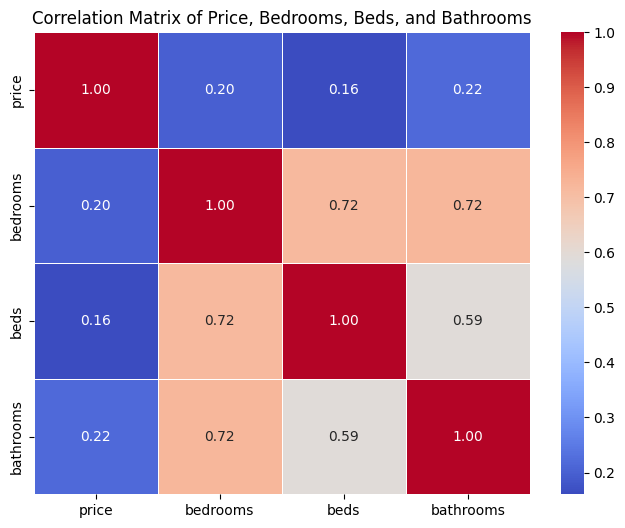

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant columns
correlation_data = df_cleaned[['price', 'bedrooms', 'beds', 'bathrooms']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Price, Bedrooms, Beds, and Bathrooms')
plt.show()


### Summary:
The matrix confirms that there are weak positive correlations between price and the number of bedrooms, beds, and bathrooms, reflecting the trends seen in the SQL results. Larger properties with more bedrooms and bathrooms are generally more expensive, but other factors might also influence pricing.

### Question 4
Which neighbourhoods have the highest review scores on average?

In [66]:
%%sql
SELECT 
    l.neighbourhood, 
    AVG(r.review_scores_rating) AS avg_review_score
FROM 
    reviews r
JOIN 
    listings l ON r.listing_id = l.id
GROUP BY 
    l.neighbourhood
ORDER BY 
    avg_review_score DESC;


 * sqlite:///rome_airbnb.db
Done.


neighbourhood,avg_review_score
"Vitinia - Rome, Lazio, Italy",5.0
"Osteria Nuova, Lazio, Italy",5.0
"Lido Di Ostia, Rome, Italy",5.0
"La Giustiniana, Lazio, Italy",5.0
Italy,5.0
"Castel Di Leva, Lazio, Italy",5.0
"Rome, Rome/Lazio, Italy",4.98
"Lido Di Ostia, Rome, Lazio, Italy",4.98
"Rome, Rm, Lazio, Italy",4.975
"Rome, Castel Di Guido, Italy/Rome/Lazio, Italy",4.975


In [67]:
%%sql
WITH PerfectScoreNeighbourhoods AS (
    SELECT 
        l.neighbourhood
    FROM 
        reviews r
    JOIN 
        listings l ON r.listing_id = l.id
    GROUP BY 
        l.neighbourhood
    HAVING 
        AVG(r.review_scores_rating) = 5
)

SELECT 
    l.neighbourhood,
    ROUND(AVG(l.price), 2) AS avg_price,
    ROUND(AVG(r.review_scores_rating), 1) AS avg_score
FROM 
    listings l
JOIN 
    reviews r ON l.id = r.listing_id
WHERE 
    l.neighbourhood IN (
        SELECT neighbourhood FROM PerfectScoreNeighbourhoods
    )
GROUP BY 
    l.neighbourhood
ORDER BY 
    avg_price DESC;


 * sqlite:///rome_airbnb.db
Done.


neighbourhood,avg_price,avg_score
"Castel Di Leva, Lazio, Italy",3500.0,5.0
Italy,513.0,5.0
"La Giustiniana, Lazio, Italy",172.5,5.0
"Vitinia - Rome, Lazio, Italy",165.5,5.0
"Lido Di Ostia, Rome, Italy",68.0,5.0
"Osteria Nuova, Lazio, Italy",49.0,5.0


### 📌 Insight
Although all these neighbourhoods have a perfect review score of 5, their average prices vary significantly — from €49 in Osteria Nuova to €3500 in Castel Di Leva.
This indicates that high guest satisfaction (review score) is not necessarily linked to higher prices. Other factors such as location, amenities, or listing type may play a bigger role in influencing price.



### Conclusion

Based on our analysis of the Rome Airbnb listings, we discovered several key insights:

1. **Price Variation Across Neighborhoods**: The price of listings varies significantly across different neighborhoods in Rome. The more expensive neighborhoods tend to offer entire apartments or homes, while more affordable neighborhoods often provide private room options. This indicates a clear distinction between the types of accommodations available in higher-priced versus lower-priced areas.

2. **Room Type and Price Correlation**: There is a clear relationship between the type of room and the price. Entire homes or apartments are generally found in more expensive neighborhoods, while private rooms dominate in cheaper areas. This supports the idea that location and room type are closely linked to the overall cost of staying in a particular area.

3. **Review Scores and Price**: Interestingly, our analysis found that there is no significant correlation between review scores and the price of the listings. Despite the variation in review ratings, the price does not appear to depend on the review scores, which suggests that factors such as location and room type play a more significant role in pricing.

4. **Price and Number of Rooms**: There is a positive correlation between the number of rooms (bedrooms, bathrooms, and beds) and the price of the listing. Listings with more rooms tend to be priced higher, indicating that larger properties are generally more expensive, reflecting both the increased space and the amenities they offer.

Overall, the data suggests that neighborhood, room type, and the number of rooms are the main drivers of price in the Airbnb listings in Rome. These insights could be useful for both hosts and guests, offering a clearer picture of pricing dynamics in different areweak any part of it!